In [1]:
import os
import glob
import h5py
import netCDF4
import numpy as np
from operator import sub
from scipy import signal
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

import matplotlib

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

# display plots in SVG format
%config InlineBackend.figure_format = 'svg' 

In [2]:
##### Load Mean Wave Height Scenarios #########################

# Present Day
nc_data = netCDF4.Dataset('ex2_M.nc')

#Scenario RCP 2.5
nc_data2 = netCDF4.Dataset('ex2_2.5_M.nc')

#Scenario RCP 8.5
nc_data8 = netCDF4.Dataset('ex2_8.5_M.nc')

#Scenario TD
nc_dataTD = netCDF4.Dataset('ex2_TD_M.nc')


##### STORM SCENARIOS ##########################################

# Present Day
nc_dataS = netCDF4.Dataset('ex2_S.nc')

#Scenario RCP 2.5
nc_data2S = netCDF4.Dataset('ex2_2.5_S (new).nc')

#Scenario RCP 8.5
nc_data8S = netCDF4.Dataset('ex2_8.5_S.nc')

#Scenario TD
nc_dataTDS = netCDF4.Dataset('ex2_TD_S.nc')


#### Cyclone Scenarios ###########################################

# Present Day
nc_datac1 = netCDF4.Dataset('ex2_c1.nc')

#Scenario RCP 2.5
nc_datac2 = netCDF4.Dataset('ex2_c2.nc')


In [5]:
# Get wave overtopping by computing maximum z value at end of the model

#find max time and convert float to integer
#maxtime = nc_data.variables['globaltime'][:].max()
#tmax = int(maxtime)

#Find max y value
maxx = nc_data.variables['zb'][:,:,:].shape[2]

zmin = np.min(nc_data.variables['zs'][1,:,maxx-1])
zmin2 = np.min(nc_data2.variables['zs'][1,:,maxx-1])
zmin8 = np.min(nc_data8.variables['zs'][1,:,maxx-1])
zminTD = np.min(nc_dataTD.variables['zs'][1,:,maxx-1])


zmax = np.max(nc_data.variables['zs'][:,:,maxx-1])
zmax2 = np.max(nc_data2.variables['zs'][:,:,maxx-1])
zmax8 = np.max(nc_data8.variables['zs'][:,:,maxx-1])
zmaxTD = np.max(nc_dataTD.variables['zs'][:,:,maxx-1])
zmaxS = np.max(nc_dataS.variables['zs'][:,:,maxx-1])
zmax2S = np.max(nc_data2S.variables['zs'][:,:,maxx-1])
zmax8S = np.max(nc_data8S.variables['zs'][:,:,maxx-1])
zmaxTDS = np.max(nc_dataTDS.variables['zs'][:,:,maxx-1])
zmaxc1 = np.max(nc_datac1.variables['zs'][:,:,maxx-1])
zmaxc2 = np.max(nc_datac2.variables['zs'][:,:,maxx-1])

    
ztop = zmax - zmin
ztop2 = zmax2 - zmin2 + 0.27
ztop8 = zmax8 - zmin8 + 0.98
ztopTD = zmaxTD - zminTD + 2.34

ztopS = zmaxS - zmin 
ztop2S = zmax2S - zmin2 + 0.27
ztop8S = zmax8S - zmin8 + 0.98
ztopTDS = zmaxTDS - zminTD + 2.34

ztopc1 = zmaxc1 - zminTD
ztopc2 = zmaxc2 - zminTD

print ztop
print ztop2
print ztop8
print ztopTD
print ztopS
print ztop2S
print ztop8S
print ztopTDS

0.463021419251
0.558744399168
1.28152123704
3.09746293621
0.505727183559
0.803841559532
1.48923380431
3.92568046961


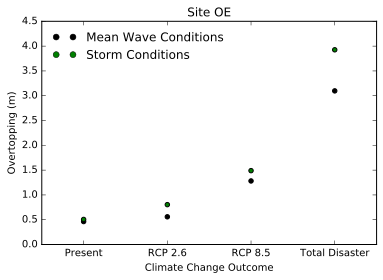

In [12]:
x1 = ["Present", "RCP 2.6", "RCP 8.5", "Total Disaster"]
x2 = ["Present", "RCP 2.6", "RCP 8.5", "Total Disaster"]

y1 = [ztop, ztop2, ztop8, ztopTD]
y2 = [ztopS, ztop2S, ztop8S, ztopTDS]

c = ["black"]*len(x1) + ["green"]*len(x2)
u, inv = np.unique(x1+x2, return_inverse=True)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(inv, y1+y2, c=c, )

f = lambda c : plt.plot([],color=c, ls="", marker="o")[0]

ax1.legend( loc='upper left',bbox_to_anchor=(0,1), handles = [f("black"), f("green")], 
           labels=['Mean Wave Conditions', 'Storm Conditions'], frameon=False)


ax1.set_xticks(range(len(u)))
ax1.set_xticklabels(u)

ax1.set_title('Site OE')
ax1.set_xlabel('Climate Change Outcome')
ax1.set_ylabel('Overtopping (m)')



plt.show()

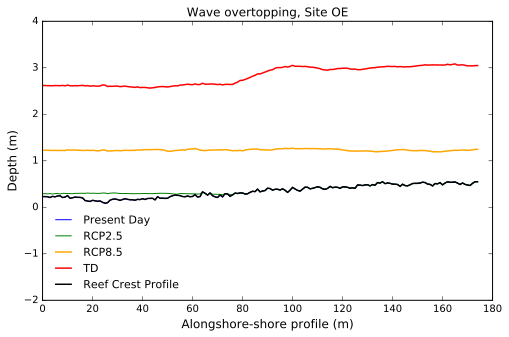

In [6]:
xp = 769.99

#Select which model to plot:

top1 = nc_data.variables['zs'][:,:,xp]
top2 = nc_data2.variables['zs'][:,:,xp]+0.27
top3 = nc_data8.variables['zs'][:,:,xp]+0.98
top4 = nc_dataTD.variables['zs'][:,:,xp]+2.34

#top1S= nc_dataS.variables['zs'][:,:,xp]
#top2S= nc_data2S.variables['zs'][:,:,xp]+0.27
#top3S= nc_data8S.variables['zs'][:,:,xp]+0.98
#top4S= nc_dataTDS.variables['zs'][:,:,xp]+2.34


zbx1 = nc_data.variables['zb'][1,:,xp]


def plot_topping_profile(top1, top2, zbx1):
    
    fig, ax1 = plt.subplots(figsize=(10,5), sharey = 'all')
    fig.subplots_adjust(right=0.75)##
    
    ax1.plot(np.amax(top1,axis=0), 'blue', label='Present Day', linewidth=1)
    ax1.plot(np.amax(top2,axis=0), 'green', label='RCP2.5', linewidth=1)
    ax1.plot(np.amax(top3,axis=0), 'orange', label='RCP8.5', linewidth=1.5)
    ax1.plot(np.amax(top4,axis=0), 'red', label='TD', linewidth=1.5)
    
    ax1.plot(zbx1, 'black', label='Reef Crest Profile', linewidth=1.5)

    ax1.set_xlabel('Alongshore-shore profile (m)', size=12)
    ax1.set_ylabel('Depth (m)', size=12)
    ax1.tick_params(axis='x', labelsize=10)
    ax1.tick_params(axis='y', labelsize=10)
    
    ax1.set_ylim(-2,4)

    ax1.legend(loc = ('best'), fontsize=11, frameon = False)
    
    ax1.set_title('Wave overtopping, Site OE')
    plt.figure(dpi=800)
    plt.show()

plot_topping_profile(top1, top2, zbx1)

### Try plotting the same thing in the crossshore profile

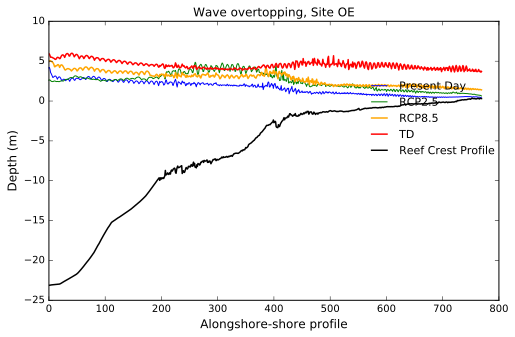

In [7]:
yp = 80

#top1 = nc_data.variables['zs'][:,yp,:]
#top2 = nc_data2.variables['zs'][:,yp,:] +0.27
#top3 = nc_data8.variables['zs'][:,yp,:] +0.98
#top4 = nc_dataTD.variables['zs'][:,yp,:] +2.34

top1S = nc_dataS.variables['zs'][:,yp,:]
top2S = nc_data2S.variables['zs'][:,yp,:] +0.27
top3S = nc_data8S.variables['zs'][:,yp,:] +0.98
top4S = nc_dataTDS.variables['zs'][:,yp,:] +2.34

zbx1 = nc_data.variables['zb'][1,yp,:]




def plot_topping_profile(top1S, top2S, zbx1):
    
    fig, ax1 = plt.subplots(figsize=(10,5), sharey = 'all')
    fig.subplots_adjust(right=0.75)
    #ax2 = ax1.twinx()
    
    ax1.plot(np.amax(top1S,axis=0), 'blue', label='Present Day', linewidth=1)
    ax1.plot(np.amax(top2S,axis=0), 'green', label='RCP2.5', linewidth=1)
    ax1.plot(np.amax(top3S,axis=0), 'orange', label='RCP8.5', linewidth=1.5)
    ax1.plot(np.amax(top4S,axis=0), 'red', label='TD', linewidth=1.5)

    #ax1.plot(np.amax(top1S,axis=0), 'blue', label='Present Day (Storm)', linewidth=1)#, linestyle = 'dashed')
    #ax1.plot(np.amax(top2S,axis=0), 'green', label='RCP2.5(Storm)', linewidth=1)#, linestyle = 'dashed')
    #ax1.plot(np.amax(top3S,axis=0), 'orange', label='RCP8.5(Storm)', linewidth=1.5)#, linestyle = 'dashed')
    #ax1.plot(np.amax(top4S,axis=0), 'red', label='TD (Storm)', linewidth=1.5)#, linestyle = 'dashed')
    
    #ax2.set_ylabel('x-Direction Velocity (m/s)', size=12)
    #ax2.yaxis.label.set_color('black')
    #ax2.tick_params(axis='y', labelsize=11)
    
   
    
    ax1.plot(zbx1, 'black', label='Reef Crest Profile', linewidth=1.5)

    

    ax1.set_xlabel('Alongshore-shore profile', size=12)
    ax1.set_ylabel('Depth (m)', size=12)
    ax1.tick_params(axis='x', labelsize=10)
    ax1.tick_params(axis='y', labelsize=10)

    ax1.legend(loc = (0.7,0.5), fontsize=11, frameon = False)
    #ax2.legend( loc = (0.5, 0.85), fontsize=11, frameon = False)
    #ax3.legend( loc = (0.8, 0.88), fontsize=11, frameon = False)
    
    #plt.ylim((-2,4))
    plt.title('Wave overtopping, Site OE')
    plt.figure(dpi=800)
    plt.show()

plot_topping_profile(top1S, top2S, zbx1)

In [8]:
#print ztopTDS
zminTD = np.mean(nc_dataTD.variables['zb'][0,:,maxy-1])
zmaxTD = np.mean(nc_dataTDS.variables['zs'][:,:,maxy-1])

#print (zmaxTD)
#print (zminTD)
#print (zmaxTD - zminTD)

print zmax
print zmin


#print 'wave overtopping =', (zmax), 'meters'
#print 'wave overtopping in a storm =', (zmaxS), 'meters'

NameError: name 'maxy' is not defined

In [ ]:
#listing input parameters
## MEAN WAVE CONDITIONS
RCP0_H = 1.21
RCP0_T = 5.5
RCP0_fw = 0.9
RCP0_SL = 0

RCP2_H = 1.93
RCP2_T = 6.96
RCP2_fw = 0.54
RCP2_SL = 0.27

RCP8_H = 1.93
RCP8_T = 6.96
RCP8_fw = 0.1
RCP8_SL = 1

RCPTD_H = 1.93
RCPTD_T = 6.96
RCPTD_fw = 0.01
RCPTD_SL = 2.34

## STORM WAVE CONDITIONS
RCP0S_H = 4.72
RCP0S_T = 10.87
RCP0S_fw = 0.9
RCP0S_SL = 0

RCP2S_H = 5.51
RCP2S_T = 11.74
RCP2S_fw = 0.54
RCP2S_SL = 0.27

RCP8S_H = 5.51
RCP8S_T = 11.74
RCP8S_fw = 0.1
RCP8S_SL = 1

RCPTDS_H = 5.51
RCPTDS_T = 11.74
RCPTDS_fw = 0.01
RCPTDS_SL = 2.34

## CYCLONE WAVE CONDITIONS

C1_H = 7.6
C1_T = 13.8
C1_fw = 0.9
C1_SL = 0.3

C2_H = 7.6
C2_T = 13.8
C2_fw = 0.1
C2_SL = 1.54



x = [RCP0_H, RCP2_H, RCP8_H, RCPTD_H, RCP0S_H, RCP2S_H, RCP8S_H, RCPTDS_H, C1_H, C2_H]

y2 = [RCP0_fw, RCP2_fw, RCP8_fw, RCPTD_fw, RCP0S_fw, RCP2S_fw, RCP8S_fw, RCPTDS_fw]


#names = ['RCP0_H', 'RCP2_H', 'RCP8_H', 'RCPTD_H', 'RCP0S_H', 'RCP2S_H', 'RCP8S_H', 'RCPTDS_H']

y = [ztop, ztop2, ztop8, ztopTD, ztopS, ztop2S, ztop8S, ztopTDS, ztopc1, ztopc2]

plt.scatter(x,y)
plt.xlabel('Wave Height (m)')
plt.ylabel('Overtopping (m)')


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
D = {'present_day': ztop, 'RCP 2.5': ztop2, 'RCP 8.5': ztop8, 'RCP TD': ztopTD, 'Storm': ztop2S }
#values = [ztop, ztopS]
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.xlabel('Climate Change Scenario')
plt.ylabel('Wave Overtopping (m)')
#plt.show('')


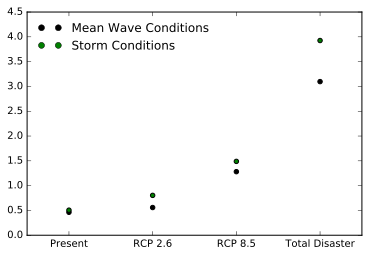

In [8]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


def plot_data(x, y):
    
    fig, ax1 = plt.subplots(figsize=(10,5), sharey = 'all')
    fig.subplots_adjust(right=0.75)##
    ax2 = ax1.twinx()
    ax3 = ax1.twinx()
    #ax4 = ax1.twinx()
    
    ax2.plot(y, 'red', label='H', linewidth=1.5)
    ax2.plot(y2, 'green', label='fw', linewidth=1.5)
    #ax2.plot(D3, 'blue', label='RCP8.5', linewidth=1.5)

    ax2.set_ylabel('Dissipation (W/m2)', size=12)
    ax2.yaxis.label.set_color('red')
    ax2.tick_params(axis='y', labelsize=11)
    
    ax3.set_ylabel('Dissipation (W/m2)', size=12)
    ax3.yaxis.label.set_color('green')
    ax3.tick_params(axis='y', labelsize=11)
    
    #ax4.set_ylabel('Dissipation (W/m2)', size=12)
    #ax4.yaxis.label.set_color('blue')
    #ax4.tick_params(axis='y', labelsize=11)
    
    ax3.spines["right"].set_position(("axes", 1.2))
    make_patch_spines_invisible(ax3)
    ax3.spines["right"].set_visible(True)
    
    #ax4.spines["right"].set_position(("axes", 1.6))
    #make_patch_spines_invisible(ax4)
    #ax4.spines["right"].set_visible(True)
    
    
    ax1.plot(x, 'black', label='Scenarios', linewidth=1.5)

    ax1.set_xlabel('Climate Change Scenaio', size=12)
    ax1.set_ylabel('Bed Depth (m)', size=12)
    ax1.tick_params(axis='x', labelsize=10)
    ax1.tick_params(axis='y', labelsize=10)

    ax1.legend(loc = (0.02,0.88), fontsize=11, frameon = False)
    ax2.legend( loc = (0.5, 0.6), fontsize=11, frameon = False)
    #ax3.legend( loc = (0.8, 0.88), fontsize=11, frameon = False)
    

    plt.title('Wave Energy Dissipation')
    plt.figure(dpi=800)
    plt.show()

plot_data(x, y)

NameError: name 'x' is not defined